# Load Data

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'I:\data_analyst\Data Crawler\Data x 1\Hasil_Preprocessing_DataPanasBumi.csv'
df = pd.read_csv(path)
df.sample(5)

,full_text,cleansing,Tokenization and Case Folding,Filtering / Stopword removal,stemming_data
390,"Badan panas bgt, kepala masih puyeng aja ga en...",Badan panas bgt kepala masih puyeng aja ga ena...,"['badan', 'panas', 'bgt', 'kepala', 'masih', '...","['badan', 'panas', 'bgt', 'kepala', 'puyeng', ...",badan panas bgt kepala puyeng aja ga enak bgt
312,"Luque y Lasso,tus panas,son mafiosos comprobad...",Luque y Lassotus panasson mafiosos comprobados...,"['luque', 'y', 'lassotus', 'panasson', 'mafios...","['luque', 'y', 'lassotus', 'panasson', 'mafios...",luque y lassotus panasson mafiosos comprobados...
337,@NotiUno Comprando votos que desesperados esta...,NotiUno Comprando votos que desesperados estan...,"['notiuno', 'comprando', 'votos', 'que', 'dese...","['notiuno', 'comprando', 'votos', 'que', 'dese...",notiuno comprando votos que desesperados estan...
238,@ustdagus @fajarnugros Temen gw nyebutnya Liam...,ustdagus fajarnugros Temen gw nyebutnya Liam G...,"['ustdagus', 'fajarnugros', 'temen', 'gw', 'ny...","['ustdagus', 'fajarnugros', 'temen', 'gw', 'ny...",ustdagus fajarnugros temen gw nyebutnya liam g...
320,Season of warmth? Di Indonesia bukannya cuacan...,Season of warmth Di Indonesia bukannya cuacany...,"['season', 'of', 'warmth', 'di', 'indonesia', ...","['season', 'of', 'warmth', 'indonesia', 'cuaca...",season of warmth indonesia cuaca panas panas b...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   full_text                      445 non-null    object
 1   cleansing                      445 non-null    object
 2   Tokenization and Case Folding  445 non-null    object
 3   Filtering / Stopword removal   445 non-null    object
 4   stemming_data                  445 non-null    object
dtypes: object(5)
memory usage: 17.5+ KB


In [4]:
df = pd.DataFrame(df['stemming_data'])
print(type(df))
df.sample(5)

<class 'pandas.core.frame.DataFrame'>


,stemming_data
4,teknologi nama payung topi drpd jpo diatapin m...
443,pdhl gue udh nasehatin ninggalin barang panas ...
393,ment por mis panas doy la ultima gota de mi sa...
423,salir con los panas es estar dici ndole vamos ...
65,makan makan panas dah set ok je nak makan past...


In [6]:
# !pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ----- ---------------------------------- 92.2/626.3 kB 2.6 MB/s eta 0:00:01
   ------------------ --------------------- 286.7/626.3 kB 3.5 MB/s eta 0:00:01
   ---------------------------------- ----- 532.5/626.3 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------  614.4/626.3 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 3.3 MB/s eta 0:00:00


In [7]:
from textblob import TextBlob

In [10]:
labels = []
scores = []

for text in df['stemming_data']:
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    scores.append(polarity)

    if polarity > 0:
        label = 'positif'
    elif polarity < 0:
        label = 'negatif'
    else:
        label = 'netral'

    labels.append(label)

df['sentiment_score'] = scores
df['sentiment'] = labels

df.sample(5)

,stemming_data,sentiment_score,sentiment
77,chipng domm ku panas asli,0.000000,netral
156,gua jg tuju trotoar jpo atap batam pohon gede ...,0.000000,netral
386,thabruh vi algo que desear a no haber visto ht...,0.000000,netral
372,cari kos deket kantor minimal jarak tempuh gak...,-0.133333,negatif
267,pixelgyu iiih gapapa ga kak perutnyaa panas mu...,0.000000,netral


# VISUALISASI DATA

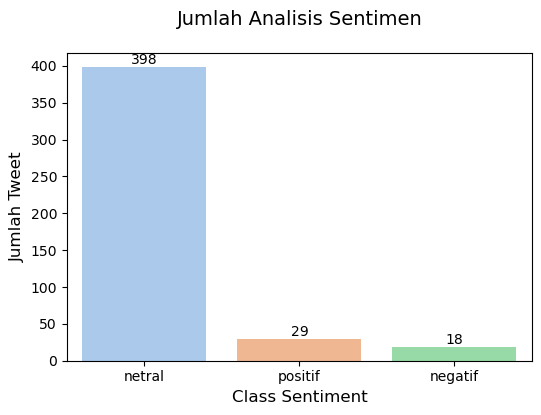

In [11]:
sentiment_count = df['sentiment'].value_counts()

# sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6,4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

for i, count in enumerate(sentiment_count.values):
    ax.text(i, count+0.10, str(count), va='bottom',ha='center')

plt.show()

# Save Data to CSV

In [ ]:
df.to_csv('Hasil_Labeling_DataPanasBumi_textblob.csv', encoding='utf8', index=False)